In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
path = r'C:\Users\Josh Wattay\anaconda3\ClimateWins Analysis\01 - Data'

In [3]:
df_weather = pd.read_csv(os.path.join(path, 'weather_for_models.csv'))

In [4]:
df_weather.head()

,Unnamed: 0,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [6]:
df_weather = df_weather.loc[:, ~df_weather.columns.str.contains('^Unnamed')]


In [7]:
df_weather.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [8]:
pleasant_days = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [11]:
pleasant_days.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.multioutput import MultiOutputClassifier

In [12]:
#subset for plotting the relevant weather data

columns = ['BASEL_temp_mean', 'BASEL_temp_max', 'BASEL_temp_min', 
           'BELGRADE_temp_mean', 'BELGRADE_temp_max', 'BELGRADE_temp_min',
          'BUDAPEST_temp_mean', 'BUDAPEST_temp_max', 'BUDAPEST_temp_min',
          'DEBILT_temp_mean', 'DEBILT_temp_max', 'DEBILT_temp_min',
          'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_max', 'DUSSELDORF_temp_min',
          'HEATHROW_temp_mean', 'HEATHROW_temp_max', 'HEATHROW_temp_min',
          'KASSEL_temp_mean', 'KASSEL_temp_max', 'KASSEL_temp_min',
          'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_max', 'LJUBLJANA_temp_min',
          'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_max', 'MAASTRICHT_temp_min',
          'MADRID_temp_mean', 'MADRID_temp_max', 'MADRID_temp_min',
          'MUNCHENB_temp_mean', 'MUNCHENB_temp_max', 'MUNCHENB_temp_min',
          'OSLO_temp_mean', 'OSLO_temp_max', 'OSLO_temp_min',
          'SONNBLICK_temp_mean', 'SONNBLICK_temp_max', 'SONNBLICK_temp_min',
          'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_max', 'STOCKHOLM_temp_min',
          'VALENTIA_temp_mean', 'VALENTIA_temp_max', 'VALENTIA_temp_min']

df2 = df_weather[columns]

In [13]:
df2.head()

,BASEL_temp_mean,BASEL_temp_max,BASEL_temp_min,BELGRADE_temp_mean,BELGRADE_temp_max,BELGRADE_temp_min,BUDAPEST_temp_mean,BUDAPEST_temp_max,BUDAPEST_temp_min,DEBILT_temp_mean,...,OSLO_temp_min,SONNBLICK_temp_mean,SONNBLICK_temp_max,SONNBLICK_temp_min,STOCKHOLM_temp_mean,STOCKHOLM_temp_max,STOCKHOLM_temp_min,VALENTIA_temp_mean,VALENTIA_temp_max,VALENTIA_temp_min
0,6.5,10.9,0.8,3.7,7.9,-0.9,2.4,5.1,-0.4,9.3,...,3.8,-5.9,-3.2,-8.5,4.2,4.9,2.2,8.5,10.9,6.0
1,6.1,10.1,3.3,2.9,4.4,2.2,2.3,3.1,1.4,7.7,...,2.8,-9.5,-8.5,-10.5,4.0,5.0,3.0,8.9,12.1,5.6
2,8.5,9.9,5.1,3.1,6.4,-0.5,2.7,5.3,1.7,6.8,...,0.6,-9.5,-8.9,-10.0,2.4,4.1,1.3,10.5,12.9,8.1
3,6.3,10.6,3.8,2.0,3.0,-2.0,2.0,4.4,0.4,6.7,...,0.4,-11.5,-10.0,-12.9,1.2,2.3,0.4,7.4,10.6,7.3
4,3.0,6.0,-0.7,2.0,2.8,0.7,2.5,5.3,1.1,8.0,...,2.9,-9.3,-6.5,-12.0,3.3,4.3,0.8,5.7,8.4,3.0


In [14]:
pleasant = ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather',
            'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
            'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather',
            'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
            'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']

df3 = pleasant_days[pleasant]

In [15]:
df3.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df3.shape

(22950, 15)

In [17]:
df2.shape

(22950, 45)

In [18]:
# Create an X matrix - we have already dropped the columns by subsetting to df2 (X) and df3 (y)

X = df2
y = df3

In [19]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [20]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


In [22]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

In [23]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

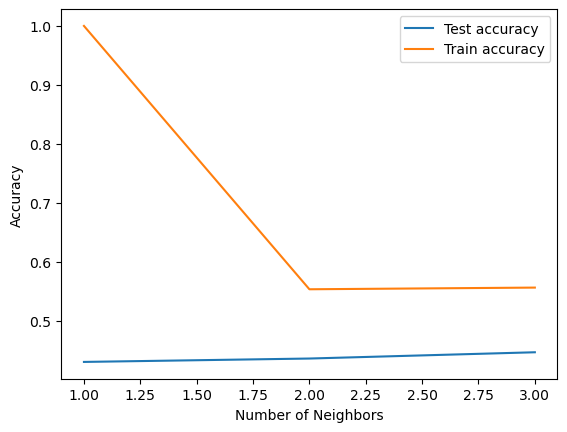

In [24]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


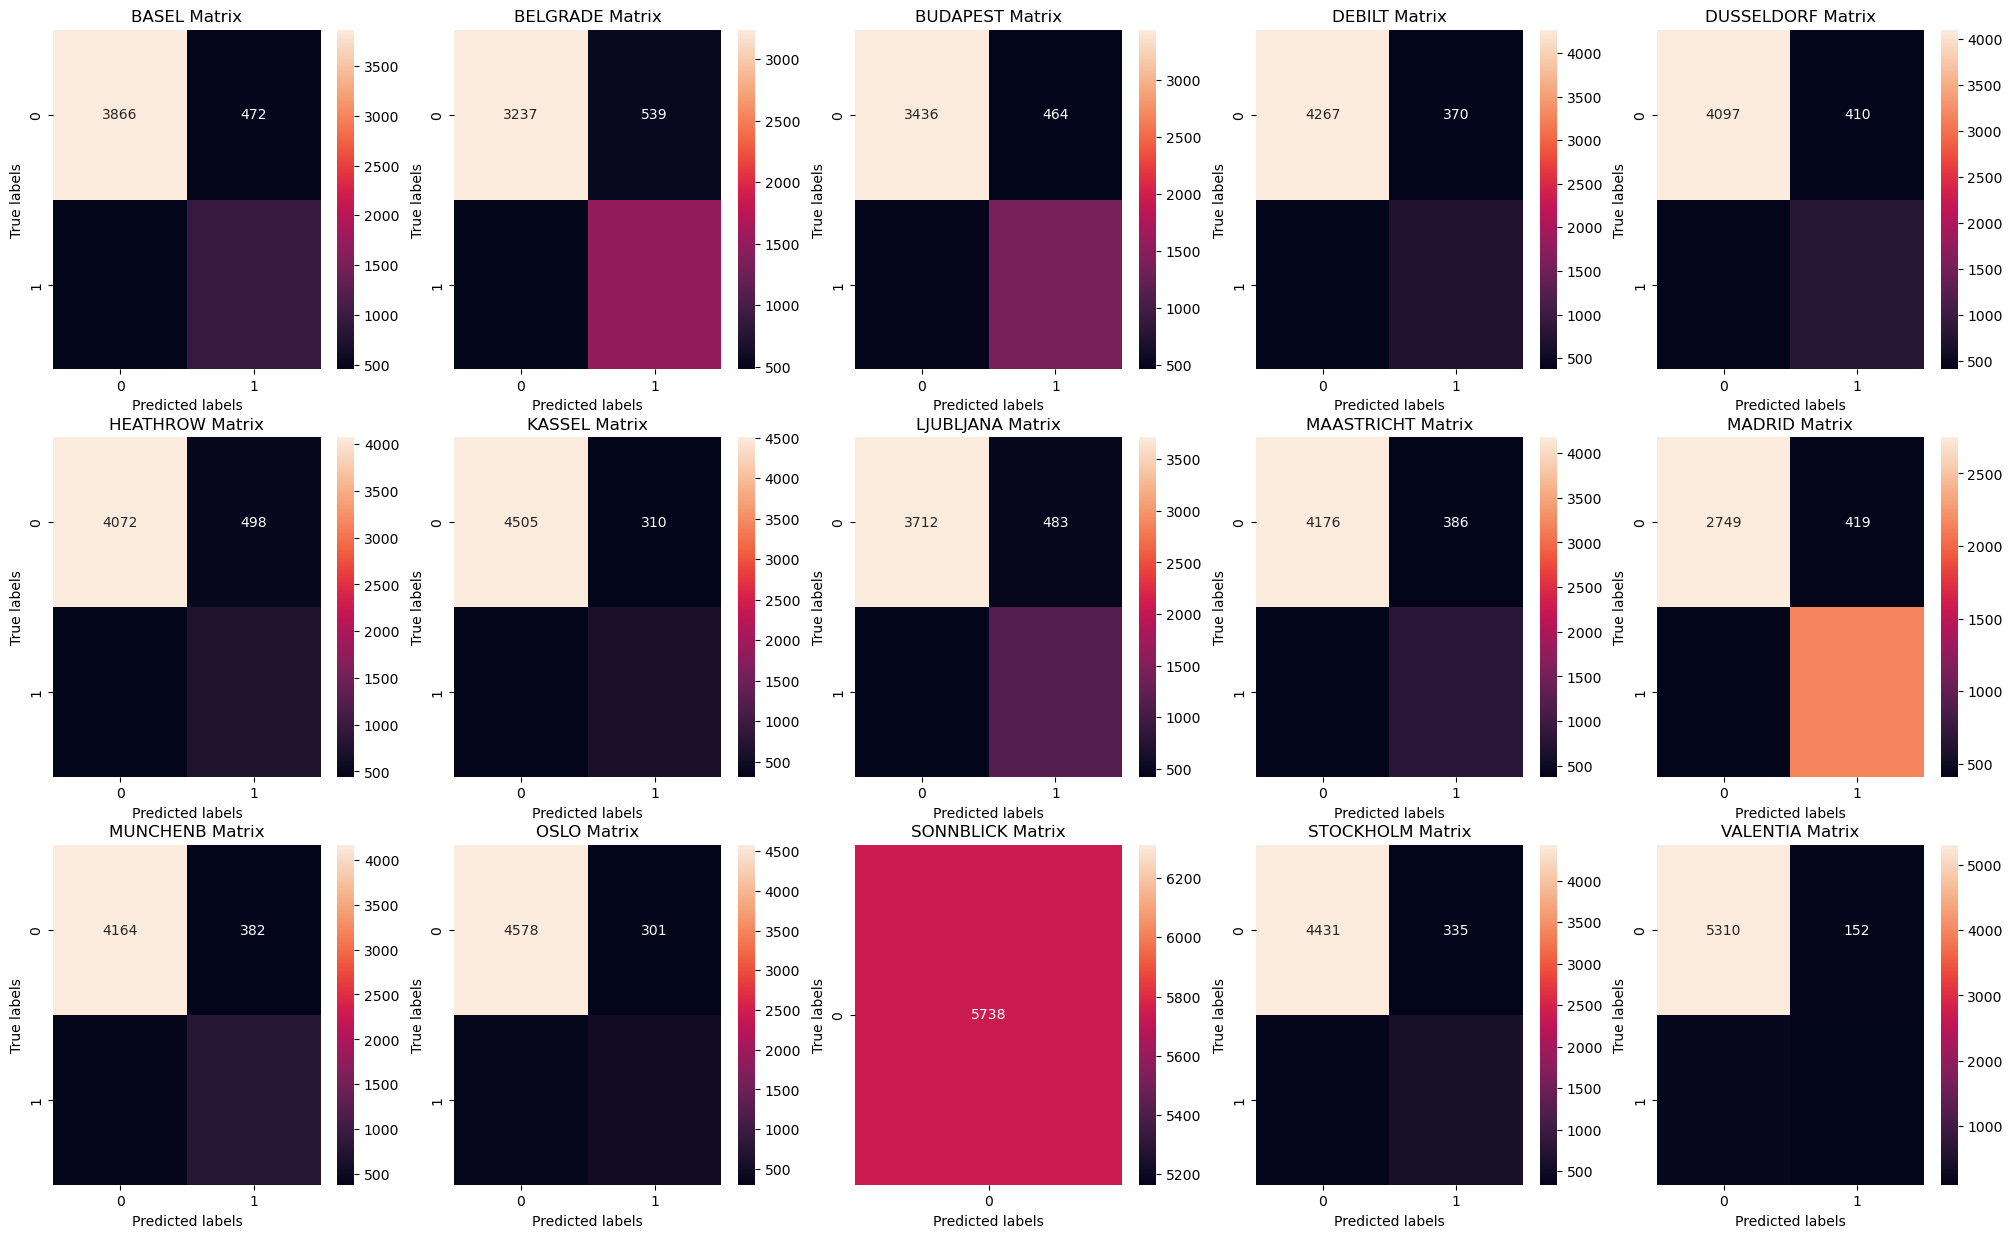

In [34]:
locations = list({x.split("_")[0] for x in df_weather.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

locations = list({x.split("_")[0] for x in df_weather if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   
count = 0

for location in locations:
    print(f"Results for {location}:")
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test.loc[:, location + key], y_pred[:, count])
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)
    
    # Print detailed classification report
    report = classification_report(y_test.loc[:, location + key], y_pred[:, count], target_names=labels)
    print("Classification Report:")
    print(report)
    
    print("\n" + "-"*50 + "\n")  # Separator between results of different cities
    
    count += 1

Results for BASEL:
Confusion Matrix:
[[3866  472]
 [ 451  949]]
Classification Report:
              precision    recall  f1-score   support

    pleasant       0.90      0.89      0.89      4338
  unpleasant       0.67      0.68      0.67      1400

    accuracy                           0.84      5738
   macro avg       0.78      0.78      0.78      5738
weighted avg       0.84      0.84      0.84      5738


--------------------------------------------------

Results for BELGRADE:
Confusion Matrix:
[[3237  539]
 [ 480 1482]]
Classification Report:
              precision    recall  f1-score   support

    pleasant       0.87      0.86      0.86      3776
  unpleasant       0.73      0.76      0.74      1962

    accuracy                           0.82      5738
   macro avg       0.80      0.81      0.80      5738
weighted avg       0.82      0.82      0.82      5738


--------------------------------------------------

Results for BUDAPEST:
Confusion Matrix:
[[3436  464]
 [ 477 136

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

In [36]:
# Get written report for Stockholm and Valentia

from sklearn.metrics import confusion_matrix, classification_report

locations = ["STOCKHOLM", "VALENTIA"]
key = "_pleasant_weather"
labels = ['pleasant', 'unpleasant']   
count = 0

for location in locations:
    print(f"Results for {location}:")
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test.loc[:, location + key], y_pred[:, count])
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)
    
    # Print detailed classification report
    report = classification_report(y_test.loc[:, location + key], y_pred[:, count], target_names=labels)
    print("Classification Report:")
    print(report)
    
    print("\n" + "-"*50 + "\n")  # Separator between results of different cities
    
    count += 1

Results for STOCKHOLM:
Confusion Matrix:
[[3875  891]
 [ 442  530]]
Classification Report:
              precision    recall  f1-score   support

    pleasant       0.90      0.81      0.85      4766
  unpleasant       0.37      0.55      0.44       972

    accuracy                           0.77      5738
   macro avg       0.64      0.68      0.65      5738
weighted avg       0.81      0.77      0.78      5738


--------------------------------------------------

Results for VALENTIA:
Confusion Matrix:
[[3588 1874]
 [ 129  147]]
Classification Report:
              precision    recall  f1-score   support

    pleasant       0.97      0.66      0.78      5462
  unpleasant       0.07      0.53      0.13       276

    accuracy                           0.65      5738
   macro avg       0.52      0.59      0.45      5738
weighted avg       0.92      0.65      0.75      5738


--------------------------------------------------

